In [1]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
#from ipywidgets import widgets
%matplotlib inline 


In [2]:
target = 'NGC3201'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
#folder = '/Users/Jill/CRRP/'+target+'/'
#optical_folder = '/Users/Jill/CRRP/OpticalCatalogs/'

## Read in variables from Clement catalog

In [49]:
#dtype1 = np.dtype([('id', 'S10'), ('period', float)])
#data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))
dtype2 = np.dtype([('id', 'S10'), ('old_period', float), ('new_period', float)])
data = np.loadtxt(folder+'periods.txt', dtype=dtype2)

datasets = optical.compile_datasets(optical_folder, target, old=0)





Datasets:

     Y0701  98656 2007-01-13 2007-01-23 k
    lcogt2  72457 2013-03-14 2013-03-23 r
    zingle  16307 1996-04-16 1996-04-19 b
     west1  13324 2005-02-11 2005-02-13 g
     wfi13  11075 2003-06-04 2003-06-06 m
    lcogt3  10301 2014-03-02 2014-03-02 c
    ct1204   8296 2012-04-24 2012-04-24 xkcd:brown
  efosc08a   7997 2008-04-19 2008-04-19 xkcd:coral
     bond6   7741 1998-04-17 1998-04-22 xkcd:purple
      lee2   7526 2011-05-30 2011-06-03 xkcd:maroon
      wfi6   7055 2002-02-20 2002-02-20 xkcd:olive
     wfi22   5618 2000-02-27 2000-02-27 xkcd:tan
efosc1101b   5595 2011-01-21 2011-01-21 xkcd:grey
     wfi41   5027 2012-02-24 2012-02-27 xkcd:teal
     west2   4830 2005-05-05 2005-05-05 xkcd:tomato
     wfi11   4810 1999-12-05 1999-12-05 xkcd:orchid
     dec97   4097 1997-12-25 1997-12-25 xkcd:goldenrod
  emmi0601   3605 2006-01-21 2006-01-21 xkcd:orange
       pab   3563 1987-01-24 1987-01-24 xkcd:khaki
  soar0805   3160 2008-05-20 2008-05-21 xkcd:darkgreen
 fors20605  

V66 0.284


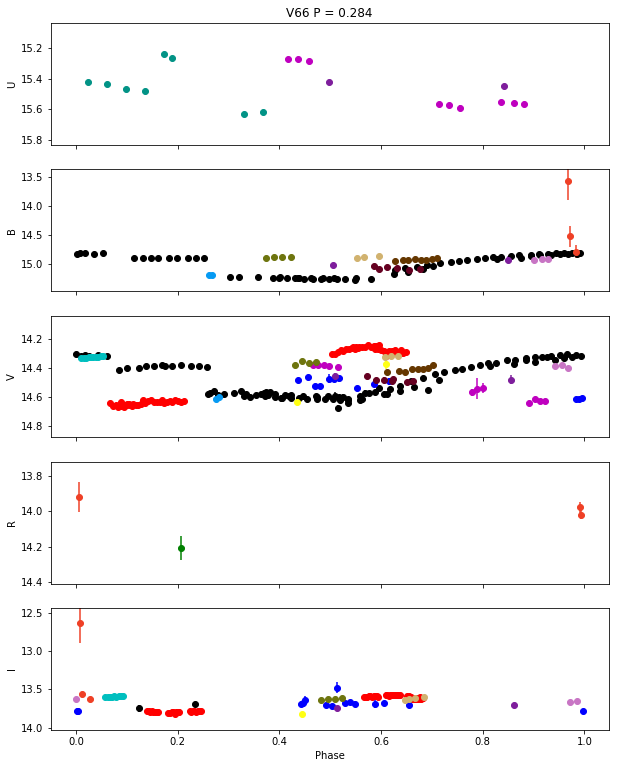

In [63]:
ind=61
print data['id'][ind], data['old_period'][ind]
lcv_file = optical_folder+target+'lcvs/'+target+data['id'][ind]+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)

lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['old_period'][ind], data['id'][ind], datasets)

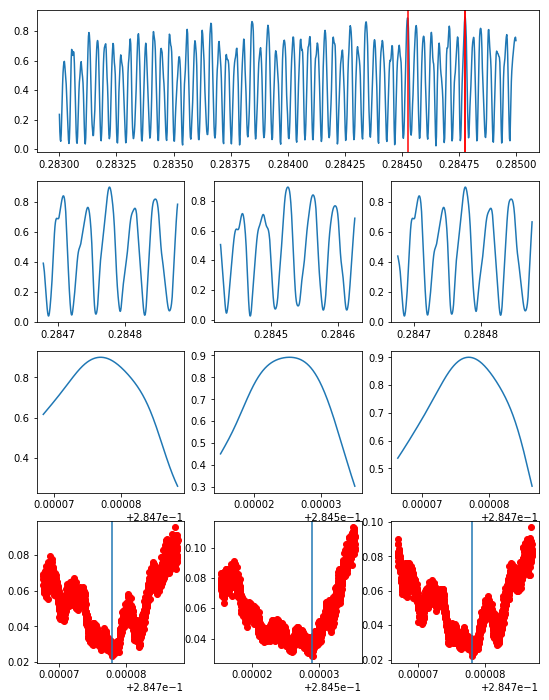

[ 0.28477796  0.28452895  0.284778  ]
[ 0.02320498  0.02820597  0.02195047]
Star  Period  Period_new
V66 0.28575193 [ 0.284778]


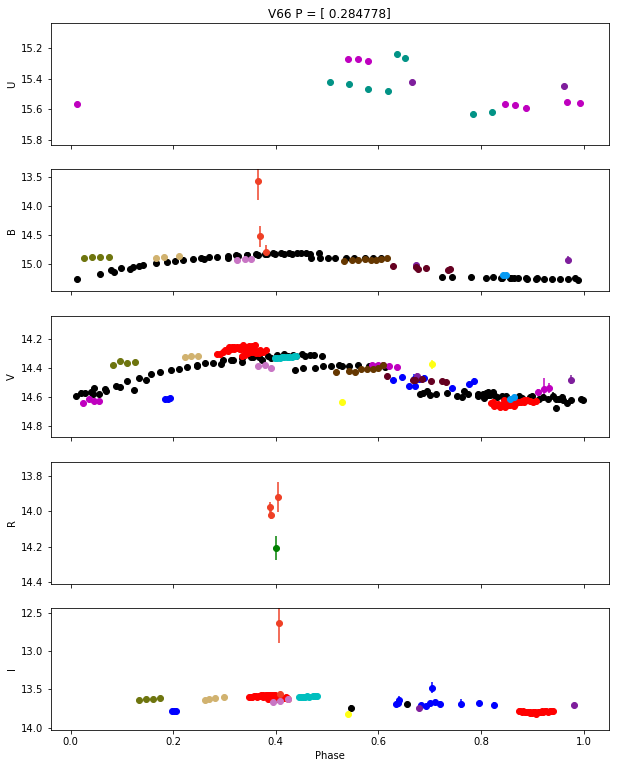

In [32]:
period = lightcurves.period_search_hybrid(V, data['old_period'][ind], data['id'][ind])
print 'Star  Period  Period_new'
print data['id'][ind], data['new_period'][ind], period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, data['id'][ind], datasets)

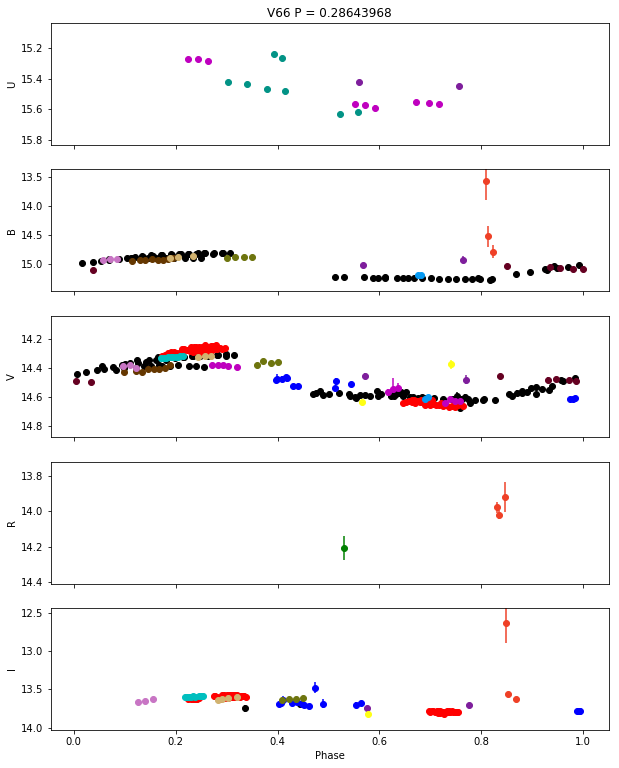

In [64]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.28643968, data['id'][ind], datasets)

# Generate MIR light curves matching optical ID number

In [4]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1)

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], folder=folder)


In [3]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    
    try:
        lightcurves.phase_lcv(folder+'lcvs/'+star+'.lcv', data['new_period'][ind], 0, save=1)
    except:
        print star, ' not found.'
        continue

V27  not found.
V30  not found.
V46  not found.
V52  not found.
V53  not found.
V54  not found.
V55  not found.
V60  not found.
V62  not found.
V63  not found.
V64  not found.
V66  not found.
V69  not found.
V72  not found.
V80  not found.
V84  not found.
